In [640]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [577]:
df = pd.read_excel("Employee Sample Data - A.xlsx")

In [578]:
df.iloc[55:65]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
55,E01797,Piper Lewis,Field Engineer,Engineering,Research & Development,Female,Caucasian,33.0,2018-12-22,NaN,0.00,United States,Chicago,NaT
56,E01839,Stella Alexander,Automation Engineer,Engineering,Corporate,Female,Caucasian,52.0,2005-12-10,102043.0,0.00,United States,Chicago,NaT
57,E01633,Addison Do,Operations Engineer,Engineering,Manufacturing,Female,Asian,46.0,2001-05-30,90678.0,0.00,United States,Columbus,NaT
58,E01848,Zoey Jackson,Business Partner,NaN,Manufacturing,Female,Black,46.0,2008-08-21,59067.0,0.00,United States,Miami,NaT
59,E00716,John Chow,Sr. Manger,Marketing,Research & Development,Male,Asian,45.0,2021-03-11,135062.0,0.15,China,Chengdu,NaT
60,E00699,Ava Ayala,Sr. Manger,IT,Corporate,Female,Latino,55.0,2006-08-16,159044.0,0.10,Brazil,Manaus,NaT
61,E00502,Natalia Salazar,Sr. Analyst,Accounting,Manufacturing,Female,Latino,44.0,2019-01-02,74691.0,0.00,Brazil,Manaus,2020-07-08
62,E04000,Skylar Carrillo,Engineering Manager,Engineering,Corporate,Female,Latino,44.0,2008-12-18,92753.0,0.13,United States,Austin,2021-06-24
63,E02112,Christian Sanders,Vice President,Human Resources,Speciality Products,Male,Black,45.0,2013-08-07,236946.0,0.37,United States,Seattle,NaT
64,E03824,Penelope Coleman,Analyst,Finance,Corporate,Female,Black,36.0,2021-08-27,48906.0,0.00,United States,Miami,NaT


Data Cleaning

In [582]:
df.drop('Exit Date',axis = 1 , inplace = True)

In [584]:
df['Job Title'] = df['Job Title'].replace('Sr. Manger', 'Sr. Manager')

In [586]:
df.dropna(subset=['EEID','Full Name'], inplace = True )

In [588]:
df.dropna(subset=['Age','Annual Salary'], how='all',inplace = True)

In [590]:
df.dropna(subset=['Job Title','Department'], how='all',inplace = True)

In [592]:
df['Hire Date']=pd.to_datetime(df['Hire Date'],format = 'mixed').dt.date

In [594]:
mask1 = df['Job Title'].isna() & df['Department'].notna() & df['Annual Salary'].notna() & df['Age'].notna()
df.loc[mask1, 'Job Title'] = df.loc[mask1].groupby(['Department', 'Annual Salary', 'Age'])['Job Title'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
print(df['Job Title'].isna().sum())
df.dropna(subset=['Job Title'], inplace = True )
print(df['Job Title'].isna().sum())

1
0


In [596]:
df['Department'] = df.groupby(['Job Title'])['Department'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
print(df['Department'].isna().sum())
df.dropna(subset=['Department'],inplace = True)
print(df['Department'].isna().sum())

0
0


In [598]:
print(df['Business Unit'].isna().sum())

0


In [600]:
print(df['Gender'].isna().sum())

1


In [602]:
df['Gender'].fillna('Female', inplace=True)

In [604]:
df['Ethnicity'].fillna('Unknown', inplace=True)

In [606]:
mask1 = df['Age'].isna() & df['Annual Salary'].notna()
df.loc[mask1, 'Age'] = df.loc[mask1].groupby(['Annual Salary','Department'])['Age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
print(df['Age'].isna().sum())
df.dropna(subset=['Age'], inplace = True )
print(df['Age'].isna().sum())

1
0


In [608]:
df['Annual Salary'] = df.groupby(['Job Title'])['Annual Salary'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
print(df['Annual Salary'].isna().sum())
df.dropna(subset=['Annual Salary'],inplace = True)
print(df['Annual Salary'].isna().sum())

0
0


In [610]:
df['Bonus %'].fillna(0.0, inplace=True)
print(df['Bonus %'].isna().sum())

0


In [612]:
print(df['Hire Date'].isna().sum())
df.dropna(subset=['Hire Date'],inplace = True)
print(df['Hire Date'].isna().sum())

2
0


In [614]:
print(df['Country'].isna().sum())

0


In [616]:
print(df.isna().sum())

EEID             0
Full Name        0
Job Title        0
Department       0
Business Unit    0
Gender           0
Ethnicity        0
Age              0
Hire Date        0
Annual Salary    0
Bonus %          0
Country          0
City             0
dtype: int64


2-Change the first 5 rows (input any values)

In [619]:
df.iloc[:5]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix


In [621]:
print(df.dtypes)

EEID              object
Full Name         object
Job Title         object
Department        object
Business Unit     object
Gender            object
Ethnicity         object
Age              float64
Hire Date         object
Annual Salary    float64
Bonus %          float64
Country           object
City              object
dtype: object


In [623]:
newRows = {
    'EEID' : ['E00001','E00002','E00003','E0004','E00005'],
    'Full Name' : ['Mohanad Mismar','Mohamad Mismar','Ahmed Mohamad','Khaled Sobhi','Amjad Tahseen'],
    'Job Title' : ['Manager','Manager','Vice President','Network Engineer','Quality Engineer'],
    'Department': ['IT','Sales','IT','IT','Engineering'],
    'Business Unit' : ['Manufacturing','Corporate','Research & Development','Speciality Products','Corporate'],
    'Gender' : ['Male','Male','Male','Male','Male'],
    'Ethnicity' : ['Asian','Asian','Black','Asian','Black'],
    'Age' : [21.0,22.0,53.0,34.0,62.0],
    'Hire Date' : ['2018-05-14', '2019-11-30', '2020-07-22', '2021-03-10', '2022-09-01'],
    'Annual Salary' : [45000.0, 60000.0, 75000.0, 50000.0, 85000.0],
    'Bonus %' : [0.0,0.05,0.06,0.15,0.0],
    'Country' : ['USA', 'Canada', 'Germany', 'Australia', 'Brazil'],
    'City' : ['New York', 'Toronto', 'Berlin', 'Sydney', 'São Paulo']
}
new_rows_df = pd.DataFrame(newRows)
df.loc[:4, :] = new_rows_df.values

In [625]:
df.iloc[:9]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
0,E00001,Mohanad Mismar,Manager,IT,Manufacturing,Male,Asian,21.0,2018-05-14,45000.0,0.00,USA,New York
1,E00002,Mohamad Mismar,Manager,Sales,Corporate,Male,Asian,22.0,2019-11-30,60000.0,0.05,Canada,Toronto
2,E00003,Ahmed Mohamad,Vice President,IT,Research & Development,Male,Black,53.0,2020-07-22,75000.0,0.06,Germany,Berlin
3,E0004,Khaled Sobhi,Network Engineer,IT,Speciality Products,Male,Asian,34.0,2021-03-10,50000.0,0.15,Australia,Sydney
4,E00005,Amjad Tahseen,Quality Engineer,Engineering,Corporate,Male,Black,62.0,2022-09-01,85000.0,0.00,Brazil,São Paulo
5,E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,Asian,57.0,2017-01-24,50994.0,0.00,China,Chongqing
6,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,2020-07-01,119746.0,0.10,United States,Phoenix
7,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,United States,Miami
8,E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,Caucasian,29.0,2019-01-25,113527.0,0.06,United States,Austin


3-Print the row with the largest salary.

In [628]:
max_Salary = df['Annual Salary'].max()
df.loc[df['Annual Salary'] == max_Salary]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
989,E04354,Raelynn Rios,Vice President,Sales,Manufacturing,Female,Latino,43.0,2016-08-21,258498.0,0.35,United States,Columbus


4- Group by department, and get the average age as well as average salary.

In [631]:
mean_age = df.groupby('Department')['Age'].mean()
mean_salary = df.groupby('Department')['Annual Salary'].mean()
print(f"age average : {mean_age}\n salary average: {mean_salary}")

age average : Department
Accounting         43.656250
Engineering        45.859873
Finance            45.085470
Human Resources    44.411290
IT                 44.140426
Marketing          43.216667
Sales              43.450000
Name: Age, dtype: float64
 salary average: Department
Accounting         123146.947917
Engineering        107891.445860
Finance            123105.017094
Human Resources    117398.322581
IT                  96888.608511
Marketing          129663.033333
Sales              110859.442857
Name: Annual Salary, dtype: float64


5- Group by department+ethnicity, and find the maximum age, minimum age, and median salary.

In [634]:
a = df.groupby(['Department','Ethnicity'])['Age'].max()
b = df.groupby(['Department','Ethnicity'])['Age'].min()
c = df.groupby(['Department','Ethnicity'])['Annual Salary'].median()
print(f"max age :\n {a}\n min age: \n{b} \n salary median \n{c}")

max age :
 Department       Ethnicity
Accounting       Asian        64.0
                 Black        51.0
                 Caucasian    62.0
                 Latino       62.0
Engineering      Asian        65.0
                 Black        62.0
                 Caucasian    64.0
                 Latino       64.0
Finance          Asian        64.0
                 Black        65.0
                 Caucasian    64.0
                 Latino       65.0
                 Unknown      60.0
Human Resources  Asian        64.0
                 Black        55.0
                 Caucasian    64.0
                 Latino       65.0
IT               Asian        65.0
                 Black        61.0
                 Caucasian    65.0
                 Latino       64.0
Marketing        Asian        65.0
                 Black        65.0
                 Caucasian    65.0
                 Latino       65.0
Sales            Asian        64.0
                 Black        65.0
                 

In [638]:
df.to_excel('Employess_Cleaned1.xlsx', index=False)

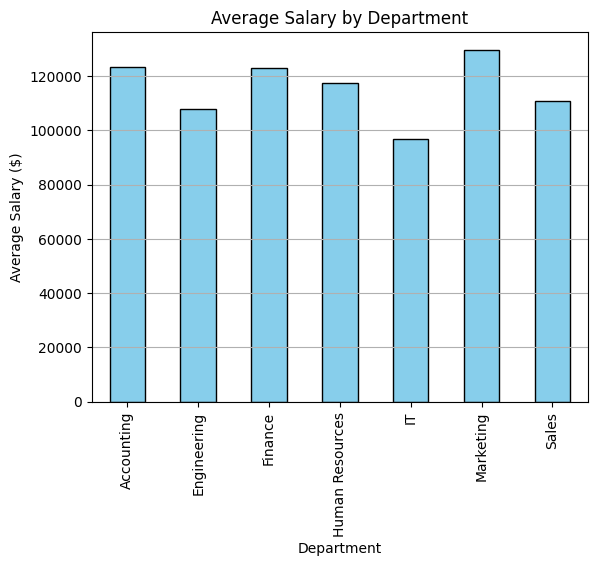

In [650]:
mean_salary.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary by Department')
plt.ylabel('Average Salary ($)')
plt.grid(axis = 'y')
plt.show()